<a href="https://colab.research.google.com/github/alikrc/urban-sounds-classification/blob/main/Urban_Sounds_Classification_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from cv2 import imshow
import tensorflow as tf
import cv2 
import glob
# from PIL import Image
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.model_selection as ms
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


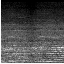

In [6]:
base_path = '/content/drive/MyDrive/soundsClassification/'

x_train=np.load(base_path+'x_train.npy')
y_train=np.load(base_path+'y_train.npy')
x_val=np.load(base_path+'x_val.npy')
y_val=np.load(base_path+'y_val.npy')
x_test=np.load(base_path+'x_test.npy')
y_test=np.load(base_path+'y_test.npy')

cv2_imshow(x_train[0])

In [7]:
np.shape(x_train), np.shape(y_train)

((5238, 64, 64), (5238,))

In [8]:
np.shape(x_val), np.shape(y_val)

((1747, 64, 64), (1747,))

In [9]:
np.shape(x_test), np.shape(y_test)

((1747, 64, 64), (1747,))

In [12]:
input_shape = 64
model = keras.Sequential(
    [
        layers.Conv2D(6, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=(input_shape, input_shape, 1)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding="valid"),


        layers.Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),


        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(84, activation='relu'),
        layers.Dropout(0.3),
        #layers.Dense(10, activation='relu'),
        #layers.Dropout(0.3),
        layers.Dense(10, activation='softmax'),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          880       
                                                                 
 average_pooling2d_3 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [13]:
model.compile(optimizer="adam" ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val))

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


164/164 [==============================] - 13s 5ms/step - loss: 2.9617 - accuracy: 0.2159 - val_loss: 1.7710 - val_accuracy: 0.3864
Epoch 2/25
164/164 [==============================] - 1s 4ms/step - loss: 1.8084 - accuracy: 0.3415 - val_loss: 1.5894 - val_accuracy: 0.4379
Epoch 3/25
164/164 [==============================] - 1s 5ms/step - loss: 1.6799 - accuracy: 0.3877 - val_loss: 1.4773 - val_accuracy: 0.4711
Epoch 4/25
164/164 [==============================] - 1s 4ms/step - loss: 1.5751 - accuracy: 0.4376 - val_loss: 1.3779 - val_accuracy: 0.4974
Epoch 5/25
164/164 [==============================] - 1s 4ms/step - loss: 1.4896 - accuracy: 0.4754 - val_loss: 1.3149 - val_accuracy: 0.5438
Epoch 6/25
164/164 [==============================] - 1s 4ms/step - loss: 1.4148 - accuracy: 0.5008 - val_loss: 1.2818 - val_accuracy: 0.5753
Epoch 7/25
164/164 [==============================] - 1s 4ms/step - loss: 1.3372 - accuracy: 0.5336 - val_loss: 1.2319 - val_accuracy: 0.5873
Epoch 8/25
164/1